import all required library

In [19]:
import pandas as pd
import re
import string
from tqdm.notebook import tqdm
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, ArrayDictionary, StopWordRemover
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
from gensim.summarization import summarize, keywords
from collections import Counter
from nltk.tokenize import word_tokenize

In [20]:
import pickle
model_mnb = 'model_sentiment_byu_tanpa_stopword.data'
# buka file namasiswa.data
f = open(model_mnb, 'rb')
# load data dari file tersebut
model_mnb = pickle.load(f)
f.close()
print(model_mnb)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, min_df=5, ngram_range=(1, 2),
                                 sublinear_tf=True)),
                ('classifier', MultinomialNB())])


In [21]:
import pandas as pd
data = pd.read_csv("tweet_implementasi.csv")

data.sort_values("created_at", ascending = True)

data.head()

created_at               source  \
0  2020-12-27 06:49:32+00:00  Twitter for Android   
1  2020-12-27 06:49:07+00:00  Twitter for Android   
2  2020-12-27 06:48:44+00:00  Twitter for Android   
3  2020-12-27 06:41:22+00:00  Twitter for Android   
4  2020-12-27 06:39:37+00:00  Twitter for Android   

                                                text      label  
0  By.U please kerja sama cuma bbrp jam doang ple...  unlabeled  
1  Happy 1st Anniversary @byu_id \nSering sering ...  unlabeled  
2                            beli kuota byu kapan ya  unlabeled  
3  Techi waktu itu msh 17 tahun loh. Dan dia udh ...  unlabeled  
4        byu anjggggg ini lagi t7s dodol malah lemot  unlabeled

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  1075 non-null   object
 1   source      1075 non-null   object
 2   text        1075 non-null   object
 3   label       1075 non-null   object
dtypes: object(4)
memory usage: 33.7+ KB


In [23]:
y = pd.DataFrame(columns=['source','text','label'])
hasil_tes = model_mnb.predict(data.text)
y['label'] = hasil_tes
y['text'] = data['text']
y['source'] = data['source']
y.head(50)

source                                               text  \
0   Twitter for Android  By.U please kerja sama cuma bbrp jam doang ple...   
1   Twitter for Android  Happy 1st Anniversary @byu_id \nSering sering ...   
2   Twitter for Android                            beli kuota byu kapan ya   
3   Twitter for Android  Techi waktu itu msh 17 tahun loh. Dan dia udh ...   
4   Twitter for Android        byu anjggggg ini lagi t7s dodol malah lemot   
5   Twitter for Android  nonton beyond klive yg ada darah tinggi gara g...   
6   Twitter for Android  indosat, kalo sinyalnya hari ini ga jelek, bul...   
7   Twitter for Android  lg coba pake @byu_id by @Telkomsel semoga cuco...   
8   Twitter for Android  Beli kartu by u telkomsel lewat link ini biar ...   
9   Twitter for Android  nonton beyond live yg ada kesel anjing byu lem...   
10  Twitter for Android                        Minta dimarahin ya? @byu_id   
11  Twitter for Android  By.U please sehari ini lancar aja buat bbrp ja...   
12  Twitter for Android           Gila byu sinyalnya jelek bgt hahahaha 😭😭   
13  Twitter for Android  Kuota udah mau abis, tiba2 dapat notif gini. M...   
14      Twitter Web App                  BY U TOLONGLAH AYOOOO JGN LEMOTTY   
15  Twitter for Android  Wahhh udah 1 tahun ajah kita @byu_id 😆 https:/...   
16  Twitter for Android                              By.u anak siapa sih?😅   
17  Twitter for Android  Baik banget by.u ngasih kuota gratisan karena ...   
18  Twitter for Android                              Sinyal byu meresahkan   
19   Twitter for iPhone  Beberapa relasi &amp; kolega di Jakarta udah p...   
20  Twitter for Android                                   by.u lemot bgttt   
21  Twitter for Android  Walaupun aku stres kalau kelamaan di kamar dan...   
22   Twitter for iPhone  gw mo beli kuota jg di sini by . u sinyalnya j...   
23   Twitter for iPhone  not gonna say this but im disgusting by u. pre...   
24     Twitter for iPad             Byu kalau mati lampu sinyalnya ilang 😢   
25  Twitter for Android  Ahh kesel banget akhir akhir ini by.u suka jel...   
26   Twitter for iPhone  Yang mana sembah pertahankan #puriz tu mana mu...   
27  Twitter for Android                      asli by u jelek bgt sinyalnya   
28  Twitter for Android                 by.u knp sih lemotnya naudzubillah   
29  Twitter for Android  Halo teman-teman, bantu temenku lulus yuk? Unt...   
30  Twitter for Android                              Byu sinyal nya sampah   
31   Twitter for iPhone                      lemot banget si by.u ya Allah   
32  Twitter for Android  Mau rayain anniversary dimana nih @byu_id http...   
33  Twitter for Android  kemarin kan aku beli kartu by.u trs ada piliha...   
34   Twitter for iPhone   Gua pake by u tp paket miskin alias 5gb 15rb....   
35  Twitter for Android  Gaes mau nanya ada yang pke kartu by.u??? Itu ...   
36  Twitter for Android  Gak 4G gak 3G, by.U Telkomsel aduhai sekali......   
37  Twitter for Android  Disni adda yg pake provider by.U ngga?? \nMint...   
38  Twitter for Android  Min @byu_id , paket yg 2,5mbps unlimited 140k ...   
39   Twitter for iPhone  hallo min @byu_id saya pakai kuota yang 10gb/h...   
40   Twitter for iPhone  Baru ngecek sisa kuota tsel gue yang ternyata ...   
41  Twitter for Android  byU dari kemaren ngisi paket gagal mulu kenapa...   
42   Twitter for iPhone  gw mau ngeluh soal kartu by.u lagi tapi udah k...   
43  Twitter for Android  Yuhuuu ga kerasa pake @byu_id  udah 9 bulan da...   
44  Twitter for Android  Dadah @byu_id, jaringan leluhurmu masih jauh l...   
45  Twitter for Android  Kuota by.u abis. Mau beli tapi kok paketnya ke...   
46  Twitter for Android  butuh simcard baru\nterus keinget by u\nakhirn...   
47  Twitter for Android   tidak berlaku untuk by.u https://t.co/92j7X7ogPD   
48   Twitter for iPhone  Byu seharian dijalan denger yt cuma kepake 3gb...   
49  Twitter for Android  By.u makin malem bukannya makin bagus malah ma...   

      label  
0   negatif  
1   positi

In [24]:
#Convert hasil ke list (hasil tadinya dalam bentuk ndarray)

l_hasil = list(hasil_tes)
print("Prediksi tweet positif: " + str(l_hasil.count("positif")))
print("Prediksi tweet negatif: " + str(l_hasil.count("negatif")))
#print("Prediksi tweet irelevant: " + str(l_hasil.count("irrelevant")))
#print("Prediksi tweet netral: " + str(l_hasil.count("netral")))

num_positif = 100*(l_hasil.count("positif")/len(l_hasil))
num_negatif = 100*(l_hasil.count("negatif")/len(l_hasil))

print("Persentase tweet positif = {:.2f} %".format(num_positif))
print("Persentase tweet negatif = {:.2f} %".format(num_negatif))

Prediksi tweet positif: 590
Prediksi tweet negatif: 485
Persentase tweet positif = 54.88 %
Persentase tweet negatif = 45.12 %


In [25]:
output_text = []
def clean_text(list_of_text):
  for text in tqdm(list_of_text):    
    text = text.translate(str.maketrans("","", string.punctuation)).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r'@\w+ ', '', text)
    text = re.sub(r'#\w+ ', '', text)
    text = re.sub(r"pic\S+", "", text)
    text = re.sub(r"www\S+", "", text)
    text = re.sub(r'\n+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    output_text.append(text)
  return output_text

In [26]:
y['text'] = clean_text(list(y['text']))

In [27]:
slanglist = pd.read_csv("slanglist.csv" ,encoding = "ISO-8859-1")

In [28]:
def slang(text):
    text = str(text).lower()
    text = nltk.word_tokenize(text)
    ul = 0
    for a in slanglist['slang']:
        w = 0
        for kt in text:
            if kt ==a:
                text[w] = slanglist['formal'][ul]
            w = w+1
        ul=ul+1
    kal = ""
    for kl in text:
        kal = kal + " " + kl
    text = kal
    return kal

In [29]:
y['text'] = y['text'].apply(lambda text : slang(text))

#Create STOP Word Remover
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
output_text = []
def stop(list_of_text):
  for text in tqdm(list_of_text): 
    text = stopword.remove(text)
    output_text.append(text)
  return output_text

data['text'] = stop(list(data['text']))
#data_noslang.to_csv("data_stop.csv",index=False)

In [30]:
stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['enggak','banget','sih','nih','yang','deh','sangat','ini','kalau','buat','kira','s3','oy','byu','aku']
 
# Merge stopword
stopword = stop_factory + more_stopword
 
dictionary = ArrayDictionary(stopword)
r_sw = StopWordRemover(dictionary)

In [31]:
y['text'] = y['text'].apply(lambda x : r_sw.remove(x))

In [32]:
# create stemmer
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()
output_text = []
def stem_data(list_of_text):
  for text in tqdm(list_of_text): 
    text = stemmer.stem(text)
    output_text.append(text)
  return output_text

In [33]:
y['text'] = stem_data(list(y['text']))

In [34]:
label_positif = y[y['label'] == "positif"]
label_positif.head(20)

source                                               text  \
1   Twitter for Android  happy 1st anniversary sering sering traktir kuota   
2   Twitter for Android                                   beli kuota kapan   
3   Twitter for Android  techi waktu masih 17 tahun loh dia pikir mungk...   
6   Twitter for Android  indosat sinyal hari enggak jelek bulan depan e...   
8   Twitter for Android  beli kartu by telkomsel lewat link biar pakai ...   
13  Twitter for Android  kuota mau habis tiba notifikasi begini terimak...   
15  Twitter for Android                                   wah 1 tahun kita   
16  Twitter for Android                                         anak siapa   
17  Twitter for Android  baik asih kuota gratis monthiversary huhuh ter...   
19   Twitter for iPhone  beberapa relasi amp kolega jakarta pakai mari ...   
22   Twitter for iPhone  mau beli kuota di sini by sinyal jelek yowes p...   
29  Twitter for Android  halo temanteman bantu teman lulus yuk kriteria...   
32  Twitter for Android                           mau raya anniversary nih   
33  Twitter for Android  kemarin kan beli kartu terus pilih 1mbps sama ...   
34   Twitter for iPhone       pakai by tapi paket miskin alias 5gb 15 ribu   
35  Twitter for Android  guys mau tanya yang pakai kartu itu ke rumah n...   
37  Twitter for Android  sini adda pakai provider minta ulas dong bagus...   
39   Twitter for iPhone  halo admin saya pakai kuota 10gb per hari kok ...   
40   Twitter for iPhone  baru ecek sisa kuota telkomsel yang nyata sisa...   
42   Twitter for iPhone             mau keluh soal kartu lagi sudah sering   

      label  
1   positif  
2   positif  
3   positif  
6   positif  
8   positif  
13  positif  
15  positif  
16  positif  
17  positif  
19  positif  
22  positif  
29  positif  
32  positif  
33  positif  
34  positif  
35  positif  
37  positif  
39  positif  
40  positif  
42  positif

In [35]:
label_positif.to_csv("tweet_pos.csv", index=False)

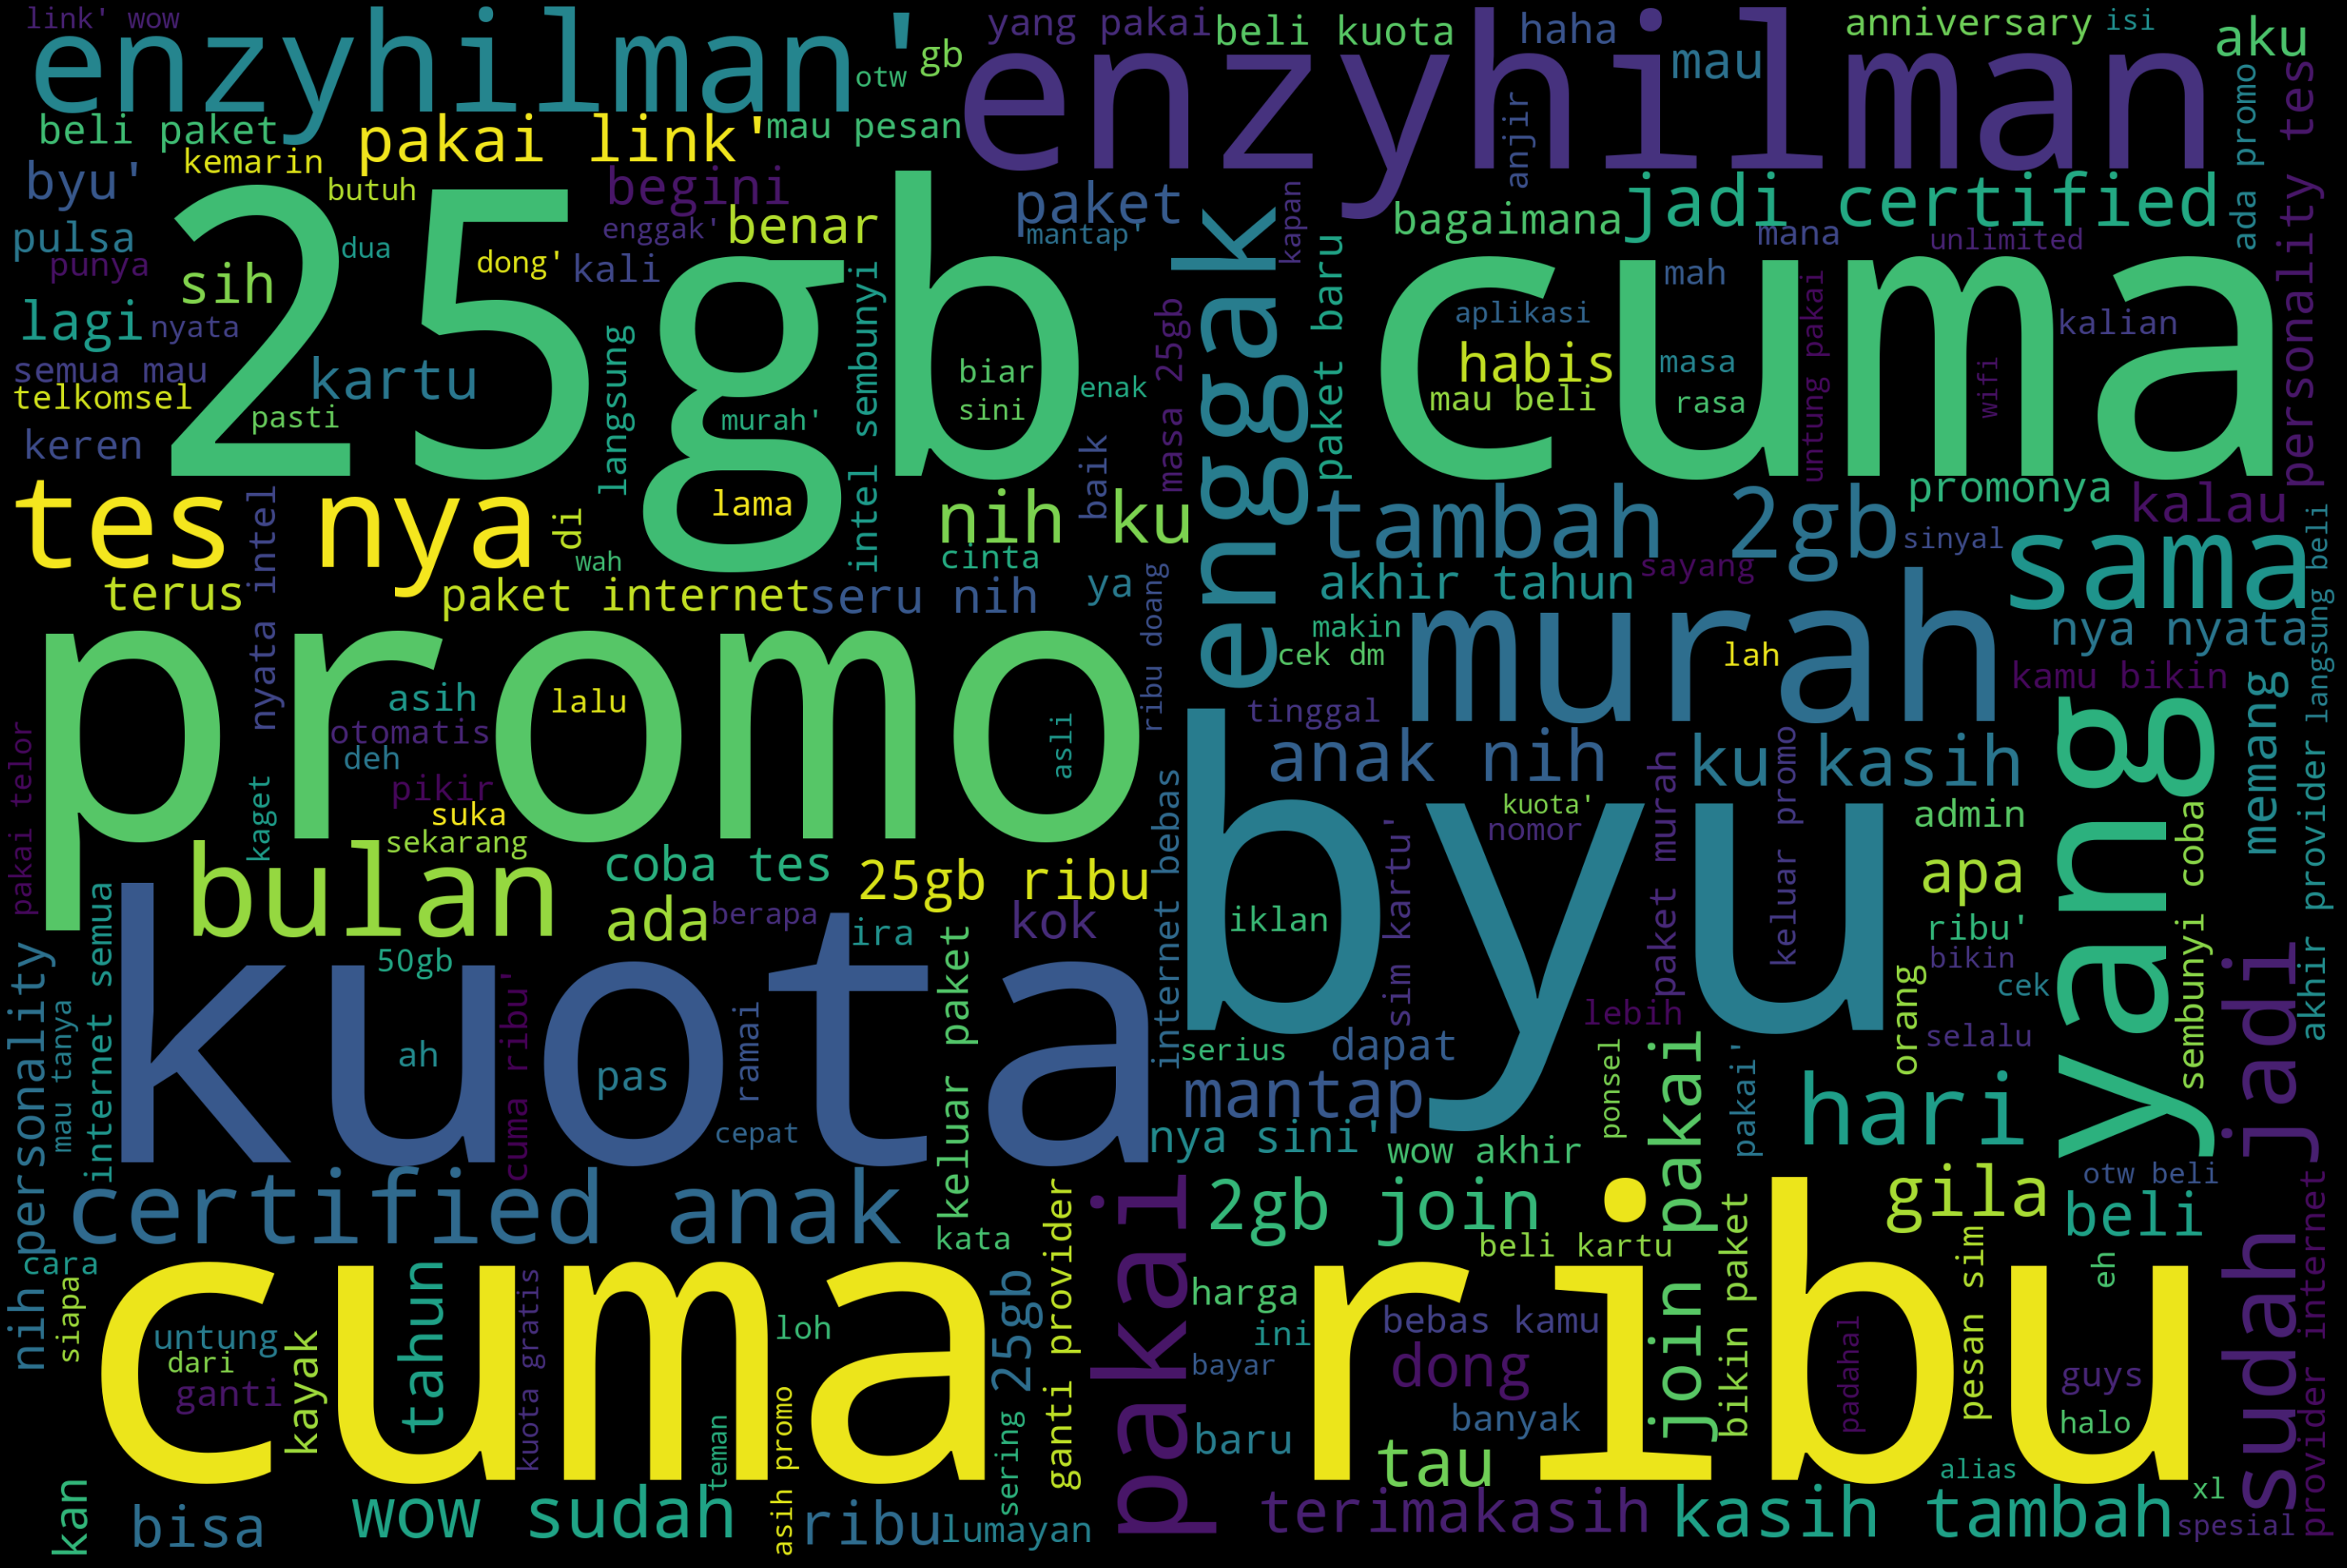

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = label_positif.text.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [37]:
label_negatif = y[y['label'] == "negatif"]

label_negatif.to_csv("tweet_neg.csv", index=False)

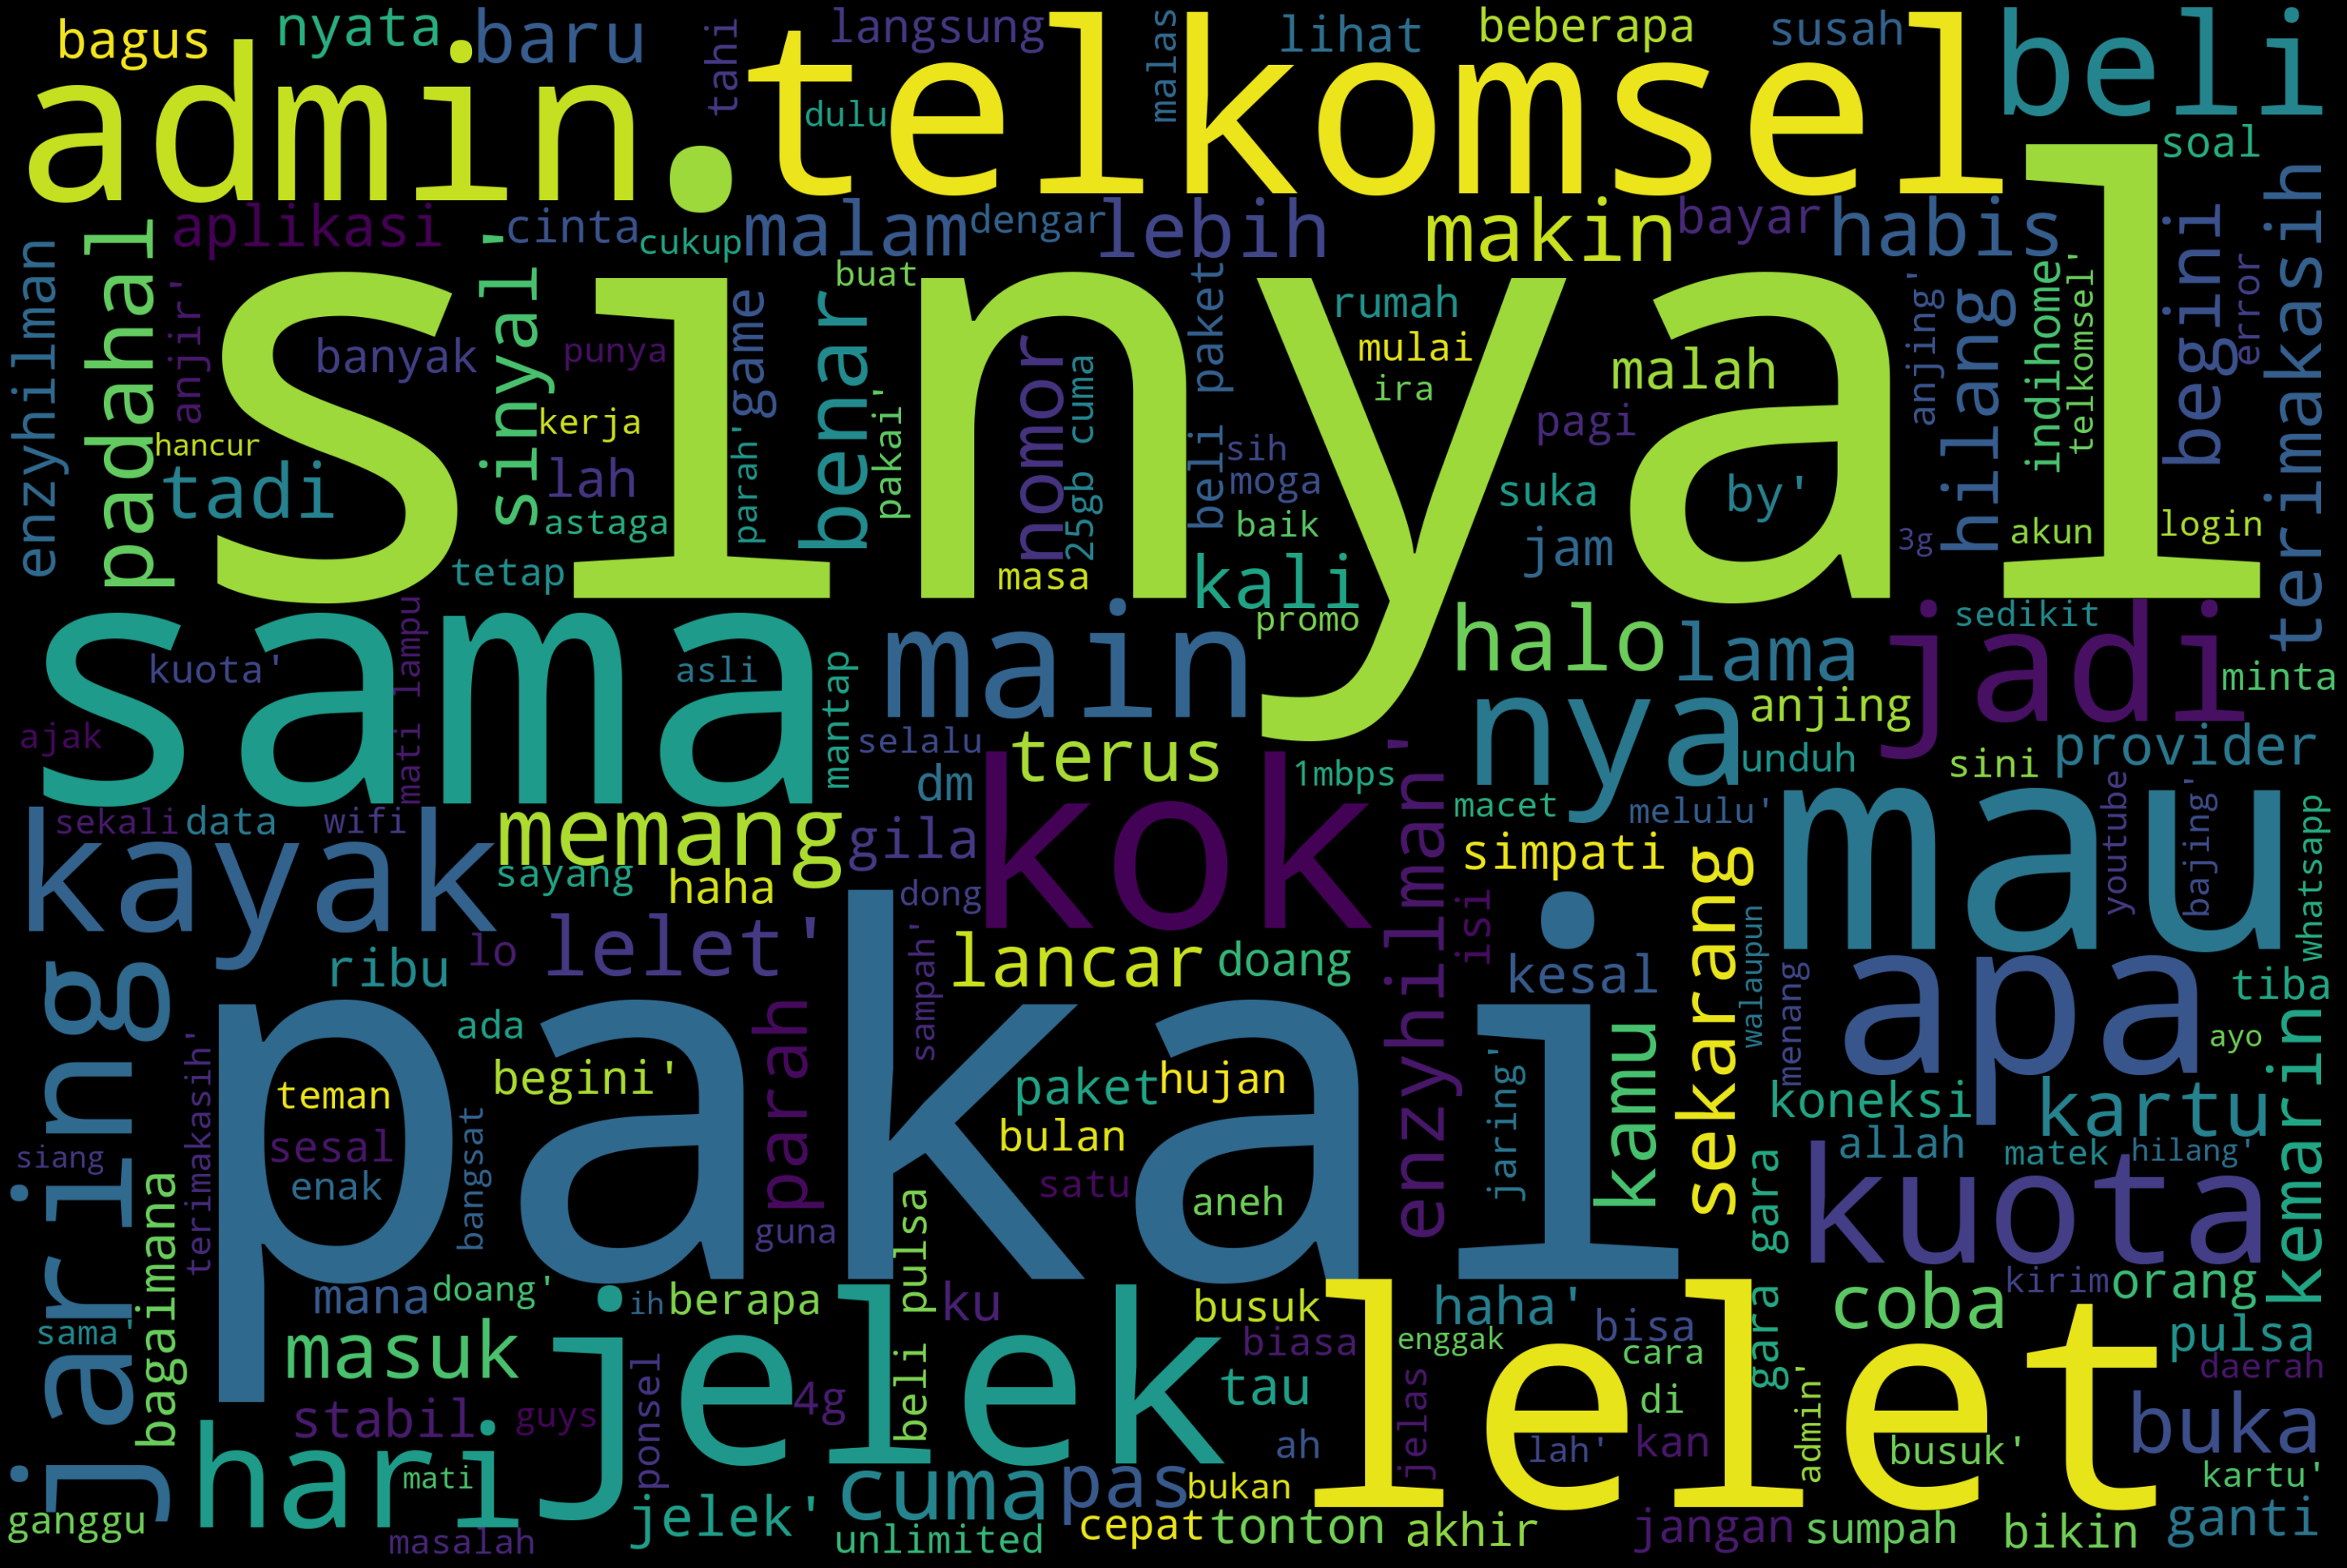

In [43]:
text = label_negatif.text.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

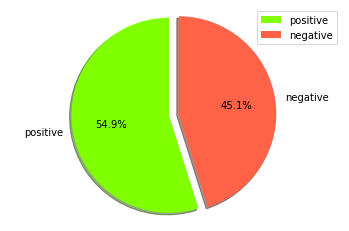

In [44]:
sizes = [l_hasil.count("positif"), l_hasil.count("negatif")]
labels = ['positive','negative']
colors = ['chartreuse', 'tomato']
explode = (0.1,0)


#patches, texts = plt.pie(sizes, colors=colors, startangle=-270)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(labels, loc="best")
plt.show()

In [45]:
positif=y.loc[y.label=="positif"]
negatif=y.loc[y.label=="negatif"]

In [46]:
positif

source                                               text  \
1     Twitter for Android  happy 1st anniversary sering sering traktir kuota   
2     Twitter for Android                                   beli kuota kapan   
3     Twitter for Android  techi waktu 17 tahun loh pikir mungkin dunia l...   
6     Twitter for Android   indosat sinyal hari jelek bulan depan jadi ganti   
8     Twitter for Android  beli kartu by telkomsel lewat link biar pakai ...   
...                   ...                                                ...   
1062  Twitter for Android                                2 mbps kesal sinyal   
1064  Twitter for Android             baik done bayar paket malahnilang duit   
1067   Twitter for iPhone             xl lelet pagi hidup segan mati tak mau   
1072      Twitter Web App  terimakasih moga anniversary kuota makin gede ...   
1074  Twitter for Android  umum penting semua sayang nindy malam upgrade ...   

        label  
1     positif  
2     positif  
3     positif  
6     positif  
8     positif  
...       ...  
1062  positif  
1064  positif  
1067  positif  
1072  positif  
1074  positif  

[590 rows x 3 columns]

In [47]:
positiftest=y.loc[y.label=="positif", 'text']
negatiftest=y.loc[y.label=="negatif", 'text']

In [48]:
positiftest

1       happy 1st anniversary sering sering traktir kuota
2                                        beli kuota kapan
3       techi waktu 17 tahun loh pikir mungkin dunia l...
6        indosat sinyal hari jelek bulan depan jadi ganti
8       beli kartu by telkomsel lewat link biar pakai ...
                              ...                        
1062                                  2 mbps kesal sinyal
1064               baik done bayar paket malahnilang duit
1067               xl lelet pagi hidup segan mati tak mau
1072    terimakasih moga anniversary kuota makin gede ...
1074    umum penting semua sayang nindy malam upgrade ...
Name: text, Length: 590, dtype: object

In [49]:
tekspositif='\n'.join(positiftest)
tekspositif

'happy 1st anniversary sering sering traktir kuota\nbeli kuota kapan\ntechi waktu 17 tahun loh pikir mungkin dunia lebih baik internet banyak jadi bully\nindosat sinyal hari jelek bulan depan jadi ganti\nbeli kartu by telkomsel lewat link biar pakai kode referral by terus bonus enak kan\nkuota mau habis tiba notifikasi begini terimakasih nindy\nwah 1 tahun\nanak siapa\nbaik asih kuota gratis monthiversary huhuh terimakasih\nbeberapa relasi amp kolega jakarta pakai coba\nmau beli kuota sini by sinyal jelek yowes pasrah moga wifi kosan ngehe\nhalo temanteman bantu teman lulus yuk kriteria guna lama 3 bulan terus terus domisili\nmau raya anniversary\nkemarin kan beli kartu terus pilih 1mbps sama 2 danbl berapa pokok beli 10kitu maksud bagaimana\npakai by paket miskin alias 5gb 15 ribu\nguys mau tanya pakai kartu ke rumah nya berapa hari\nsini adda pakai provider minta ulas dong bagus\nhalo admin pakai kuota 10gb per hari kok unduh\nbaru ecek sisa kuota telkomsel nyata sisa 10 giga 2 hari 

In [50]:
teksnegatif='\n'.join(negatiftest)
teksnegatif

'kerja sama cuma beberapa jam doang\nanjggggg t7s dodol malah lelet\ntonton beyond klive darah tinggi gara gara lelet njing amit amit\ncoba pakai by telkomsel moga cucookk\ntonton beyond live kesal anjing lelet tahi\nminta marah\nhari lancar beberapa jam mau lihat nct\ngila sinyal jelek haha\nby tolong ayo jangan lemotty\nsinyal resah\nlelet\nwalaupun stres lama kamar cenderung selalu layap coba bersemedi kost\ngon nya sayang this but im disgusting by pretending like jangan use link haram orang tonton live beyond me\nmati lampu sinyal hilang\nah kesal akhir akhir suka jelek jaring jadi tonton livenya\nmana sembah tahan puriz mana muncul laaku malas nk buka aib diekonon cukup aib orang\nasli by jelek sinyal\nlelet naudzubillah\nsinyal nya sampah\nlelet ya allah\n4g 3g telkomsel aduhai sekali\nadmin paket 25mbps unlimited 140 ribu dibalikin\nkemarin isi paket gagal melulu\nlaku\nhari jalan dengar youtube cuma pakai 3gb coba pakai simpati 12gb bulan habis cuma berapa jam utub\nmakin malam

In [51]:
summarize(tekspositif, split=True)

['beli kartu by telkomsel lewat link biar pakai kode referral by terus bonus enak kan',
 'guys mau tanya pakai kartu ke rumah nya berapa hari',
 'kuota habis mau beli kok paket banyak semua apa 50gb cuma butuh 1gb biar ponsel nyala',
 'mau beli paket terus bayar lalu shopee pay bagaimana cara tau',
 'sakit hati tadi habis beli kuota kartu pas cek nyata karti telkomsel promo',
 'tau mau bagaimana iniastaghfirullah bulan akhir isi kuota habis tak buang sim kartu mu hey',
 'keren promo paket internet murah gila parah otomatis cus pakai',
 'apa kalian pikir pas butuh paket banyak mode hemat byu dong 25 gb cuma 50 ribu edan beri',
 'mantap keluar paket baru pakai enzyhilman edan 25gb cuma 50 ribu murih paling suka ada begini terus kwkwkw',
 'ciyeee asa tahun loh bareng sama kamu wkwkek terimakasih kuota gratis per3 bulan selalu',
 'enak dong akhir tahun tani paket super murah bayang 25gb cuma 50 ribu doang',
 'memang sekarang musuh sama s1mp4ti bulan lalu paket pakai melulu 25gb cuma 50 rib

In [52]:
summarize(teksnegatif, split=True)

['gila sinyal jelek haha',
 'ah kesal akhir akhir suka jelek jaring jadi tonton livenya',
 'laku apa rumah sinyal jelek parah',
 'doang apa kalian sinyal telkomsel masuk mulai lelet habis magrib',
 'sinyal jadi jelek bangeeettttt',
 'by sama telkomsel sinyal bagus mana',
 'telkomsel allah sim kartu satu pakai telkomsel kan jelek huft',
 'et ada respon admin bisa login masa aktif habis entar malam mana beli',
 'apa beli nomor baru nomor aku sekarang susah masuk akun loading melulu bangsat',
 'kok susah masuk akun mana loadingnya lama mau masuk pakai nomor pakai data masalahny',
 'halo admin mau nanyain nomor sen kok akhir kali update nomor gagal ter',
 'halo enggak login padahal pakai jaring internet',
 'lega sama nomor sekarang soal memang pas pertama kali beli pilih nomor langsung terus 5 menit bedabeda',
 'tau kesal sama jadi reccommend main game',
 'halo mim nomor kartu hilang apa ganti admin',
 'kapan main ml jaring nya lancar anjing',
 'apa daya punya paket 25gb play game cuma onl

In [53]:
keywords(tekspositif).split('\n')

['kuota beli',
 'paket',
 'murah',
 'promo',
 'ribu guys',
 'nyata',
 'mbps sama',
 'mantap',
 'kartu',
 'tau',
 'link biar pakai kode',
 'bulan',
 'wow',
 'enzyhilman bentar ramai',
 'memang',
 'bikin',
 'mau habis tiba',
 'tahun loh pikir',
 'semua apa',
 'baru',
 'bagaimana',
 'cuma butuh',
 'langsung',
 'kok',
 'ganti',
 'begini terimakasih nindy wah',
 'coba',
 'rumah nya',
 'akhir oke',
 'seru gila',
 'orang',
 'lebih baik internet banyak jadi',
 'keluar',
 'dong bagus',
 'haha',
 'indosat sinyal hari',
 'cinta',
 'pulsa benar',
 'provider minta',
 'anak siapa',
 'kamu',
 'asih',
 'sini',
 'promonya',
 'untung',
 'keren',
 'terus bonus enak kan',
 'admin',
 'lumayan',
 'masa',
 'kali',
 'sekali',
 'kapan',
 'pas bisa',
 'cek',
 'kayak ibu',
 'tanya',
 'mana',
 'anniversary sering',
 'lah ira',
 'anjir',
 'sayang',
 'makin',
 'mah',
 'punya',
 'tinggal',
 'kata',
 'suka',
 'kemarin',
 'lalu',
 'jaring',
 'sekarang',
 'nomor',
 'halo',
 'lagi',
 'otw',
 'rasa',
 'iklan',
 'guna lam

In [54]:
keywords(teksnegatif).split('\n')

['coba pakai',
 'gila sinyal jelek haha',
 'kayak',
 'jaring jadi',
 'enzyhilman',
 'bely',
 'mau lihat',
 'malah lelet tonton',
 'terimakasih',
 'apa rumah',
 'bangsat kok',
 'telkomsel moga',
 'kamu',
 'untung beli kuota',
 'sekali admin paket',
 'padahal',
 'nya sayang',
 'begini',
 'terus',
 'benar',
 'parah',
 'kerja sama cuma beberapa jam doang',
 'halo',
 'soal memang pas',
 'lah',
 'lama',
 'nyata',
 'mana',
 'tadi pulsa',
 'nomor',
 'buka',
 'orang',
 'hilang',
 'bikin',
 'stabil main mobil',
 'provider',
 'kartu satu',
 'tau',
 'tahi minta marah hari lancar',
 'sekarang susah',
 'bagaimana',
 'kesal anjing',
 'baru',
 'bulan habis',
 'makin malam bukan',
 'game',
 'kemarin isi',
 'aplikasi',
 'gara',
 'lebih',
 'jelas',
 'ganti',
 'masa',
 'masuk mulai',
 'woy',
 'woi',
 'bagus',
 'ribu',
 'bayar',
 'aneh',
 'cepat kali',
 'busuk ngegame',
 'sesal',
 'kan',
 'cinta banyak',
 'koneksi pagi guna',
 'berapa',
 'sumpah',
 'allah',
 'anjir',
 'suka',
 'unduh',
 'bahkan indihome',


In [55]:
def get_word_frequency(tweets, count_once_per_tweet=False):
   
    count_all = Counter()
    for tweet in tweets:
        tokens = word_tokenize(tweet)
        terms_all = [term for term in tokens]
        if count_once_per_tweet:
            terms_all = set(terms_all) 
        count_all.update(terms_all) # update the counter
    return count_all

In [56]:
pos_tweet = get_word_frequency(positif['text'].values)
neg_tweet = get_word_frequency(negatif['text'].values)

In [57]:
pos_tweet

Counter({'happy': 5,
         '1st': 3,
         'anniversary': 14,
         'sering': 9,
         'traktir': 1,
         'kuota': 90,
         'beli': 95,
         'kapan': 14,
         'techi': 1,
         'waktu': 1,
         '17': 1,
         'tahun': 50,
         'loh': 11,
         'pikir': 11,
         'mungkin': 2,
         'dunia': 3,
         'lebih': 11,
         'baik': 13,
         'internet': 36,
         'banyak': 15,
         'jadi': 67,
         'bully': 1,
         'indosat': 4,
         'sinyal': 8,
         'hari': 39,
         'jelek': 2,
         'bulan': 37,
         'depan': 3,
         'ganti': 26,
         'kartu': 49,
         'by': 44,
         'telkomsel': 12,
         'lewat': 2,
         'link': 34,
         'biar': 9,
         'pakai': 140,
         'kode': 4,
         'referral': 1,
         'terus': 21,
         'bonus': 4,
         'enak': 8,
         'kan': 20,
         'mau': 65,
         'habis': 24,
         'tiba': 4,
         'notifikasi': 1,
  

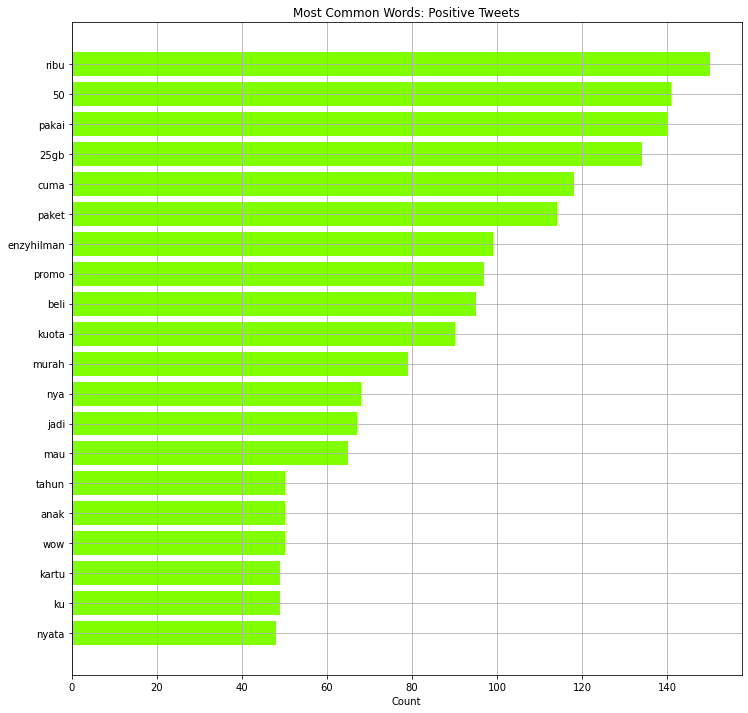

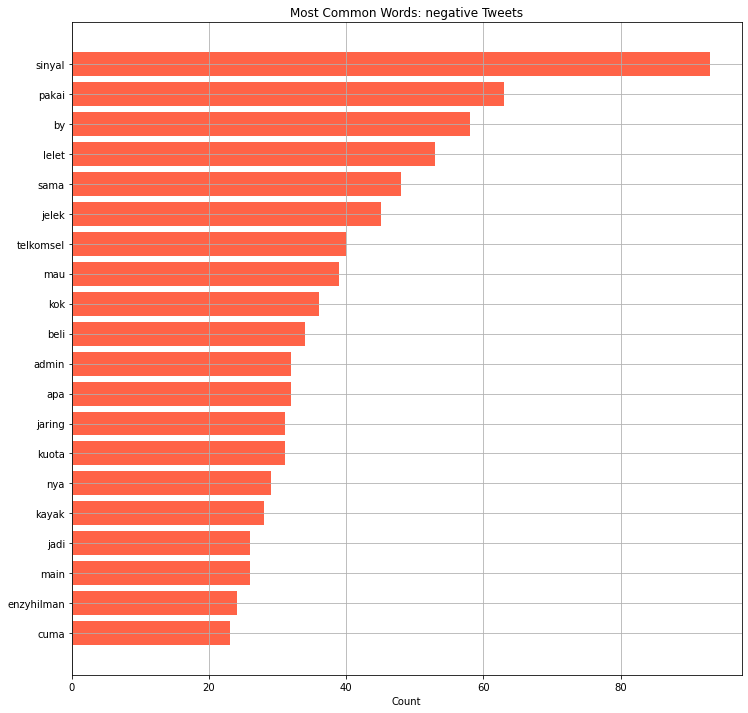

In [60]:
def plot_word_frequency(data, color='k', title='Twitter Word Count'):
    words, counts = zip(*data) 
    val = counts[::-1]   # sort the bars from longest to shortest
    words = words[::-1]
    pos = np.arange(len(data))+.5  # center the bars on the y axis
    
    plt.figure(figsize=(12,12))
    plt.barh(pos, val, align='center', color=color)
    plt.yticks(pos, words)
    plt.xlabel('Count')
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_word_frequency(pos_tweet.most_common(20),'chartreuse','Most Common Words: Positive Tweets')
plot_word_frequency(neg_tweet.most_common(20),'tomato','Most Common Words: negative Tweets')

In [136]:
positifTest=y.loc[y.label=="positif"]
negatifTest=y.loc[y.label=="negatif"]

In [137]:
def get_source_label(source):
    jum = Counter(source).most_common()
    sour = []
    for sou, count in jum[:10]:
        sour.append(sou)
    return sour

def get_count_source(source,list_source):
    count_source = []
    list_source = pd.Series(list_source, dtype=object).tolist()
    for so in source:
        count = list_source.count(so)
        count_source.append(count)
     # update the counter
    return count_source

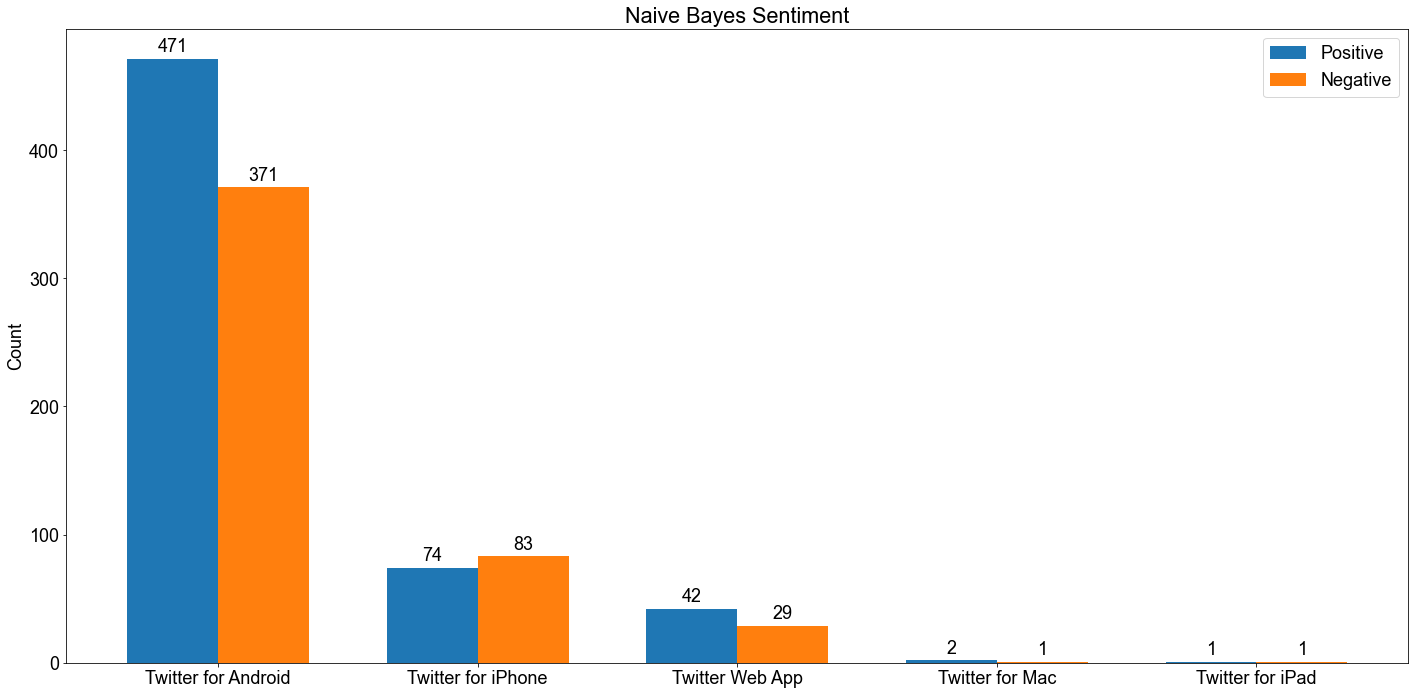

In [138]:
def show_count_sent(label,var1,var2,title):
    font = {'family' : 'arial',
            'weight' : 'normal',
            'size'   : 18}
    plt.rc('font', **font)

    labels = label
    positif = get_count_source(labels,var1)
    negatif = get_count_source(labels,var2)

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig = plt.figure(figsize=(20, 10))
    ax = fig.subplots()
    rects1 = ax.bar(x - width/2, positif, width, label='Positive')
    rects2 = ax.bar(x + width/2, negatif, width, label='Negative')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Count')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

show_count_sent(get_source_label(data['source']),positifTest['source'],negatifTest['source'],'Naive Bayes Sentiment')

In [139]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import imageio as imageio

In [140]:
def wordcloud (teks,title) :
    #background_mask = imageio.imread("speech-bubble.png")
    wc = WordCloud(background_color="black",
                   stopwords=STOPWORDS,
                   width=1800,
                   height=1400,)
                   #mask=background_mask)
    if not teks:
        teks = 'none'
    wordcloud = wc.generate(teks)
    return wordcloud

def display_wordcloud(wordcloud, title, n_components):
    print(title.title())
    plt.figure(figsize=(30, 8))
    j = np.ceil(n_components/4)
    for t in range(n_components):
        i=t+1
        plt.subplot(j, 4, i).set_title("sentimen #" + str(t))
        plt.plot()
        plt.imshow(wordcloud[t], cmap=plt.cm.jet, interpolation="bilinear", aspect='auto'); plt.xticks(()); plt.yticks(())
        plt.axis("off")
    fig.suptitle(title)
    plt.show()
    
def get_klas_tweet_nb(source,sentimen):
    source_data = y.loc[y.label==sentimen]
    sent_source_data = source_data.loc[source_data.source==source,'text']
    teks_data = " ".join(str(v) for v in sent_source_data)
    return teks_data

Twitter For Android


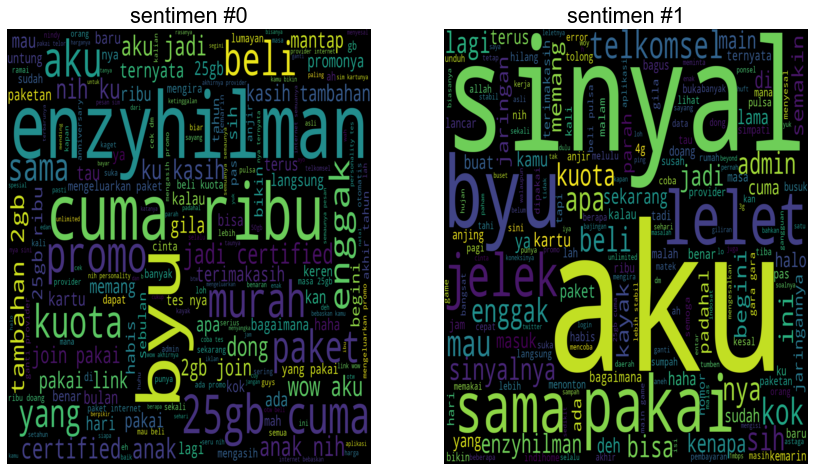

Twitter For Iphone


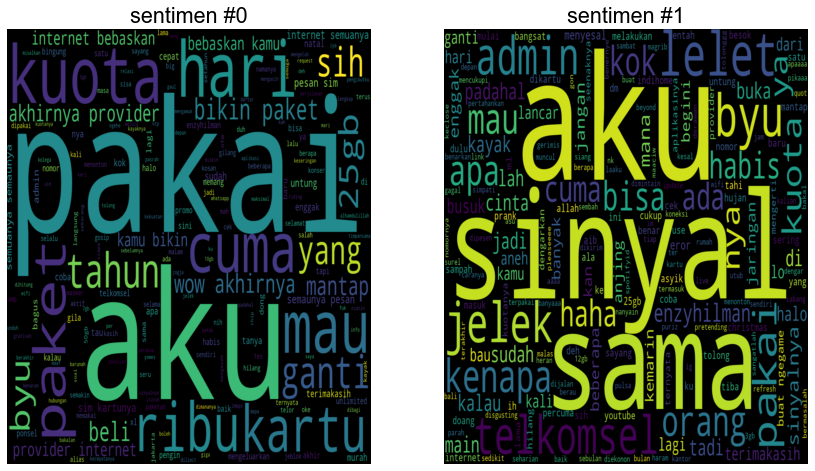

Twitter Web App


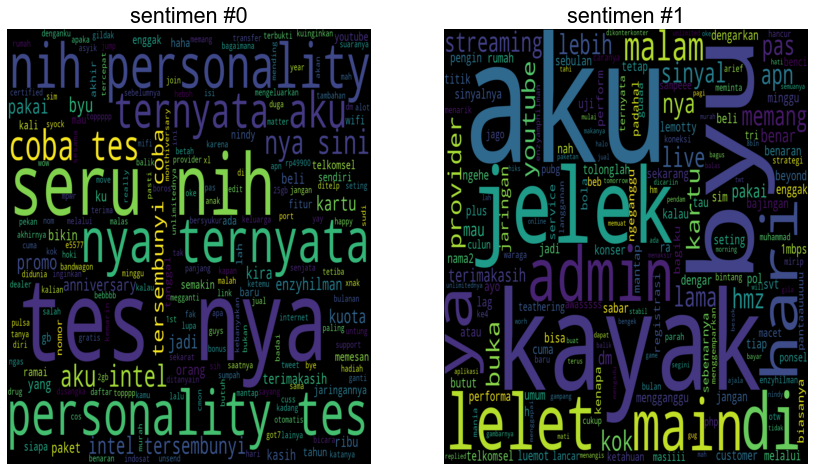

Twitter For Mac


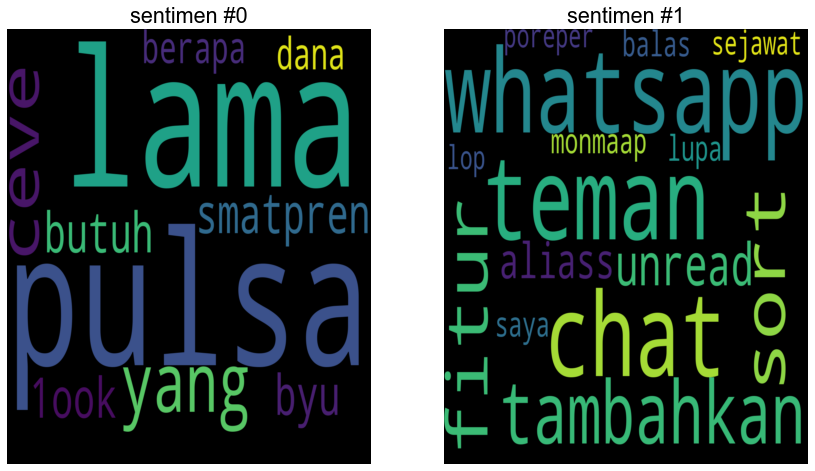

Twitter For Ipad


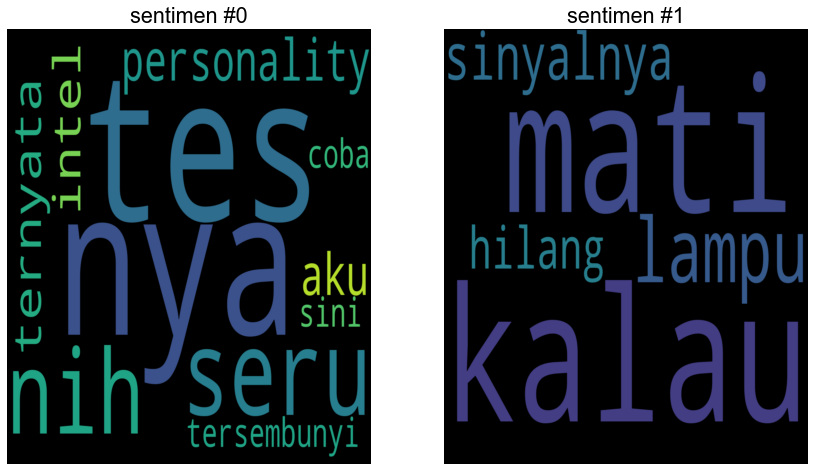

In [141]:
source = get_source_label(y['source'])

for i in source:
    wordcl = [wordcloud(get_klas_tweet_nb(i,"positif"),i),wordcloud(get_klas_tweet_nb(i,"negatif"),i)]
    display_wordcloud(wordcl, i, 2)